In [22]:
# load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from tabulate import tabulate
from xgboost import XGBClassifier

# load built package functions
from msl.MetaLearning import *
from plot_metric.functions import MultiClassClassification
from msl.cf_matrix import make_confusion_matrix

#fixing random state
random_state=123

In [4]:
# Load dataset
X, Y = load_digits(n_class=4, return_X_y=True)

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  1., 10., ..., 10.,  9.,  0.],
       [ 0.,  0., 15., ...,  6.,  2.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [6]:
Y

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 0, 1, 3, 1, 0, 0, 2, 2, 2,
       0, 1, 2, 3, 3, 3, 3, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 3, 1, 3, 1, 3,
       1, 0, 3, 1, 2, 2, 2, 0, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 0,
       1, 3, 1, 0, 0, 2, 2, 2, 0, 1, 2, 3, 3, 3, 3, 1, 0, 2, 2, 0, 0, 1,
       3, 2, 1, 3, 1, 3, 1, 3, 1, 0, 3, 1, 2, 2, 2, 0, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 0, 1, 3, 1, 0, 0, 2, 2, 2, 0, 1, 2, 3, 3, 3,
       3, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 3, 1, 3, 1, 3, 1, 0, 3, 1, 2, 2,
       2, 0, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 0, 1, 3, 1, 0, 0,
       2, 2, 2, 0, 1, 2, 3, 3, 3, 3, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 3, 1,
       3, 1, 3, 1, 0, 3, 1, 2, 2, 2, 0, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 0, 1, 3, 1, 0, 0, 2, 2, 2, 0, 1, 2, 3, 3, 3, 3, 1, 0, 2, 2,
       0, 0, 1, 3, 2, 1, 3, 1, 3, 1, 3, 1, 0, 3, 1, 2, 2, 2, 0, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 0, 1, 3, 1, 0, 0, 2, 2, 2, 0, 1, 2,
       3, 3, 3, 3, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 3,

In [7]:
# Add noisy features to make the problem more harder
random_state = np.random.RandomState(123)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 1000 * n_features)]

In [8]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  5.00000000e+00, ...,
        -3.82101810e-01, -1.93774775e-01, -2.15389211e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.16646400e-01,  1.88860654e+00,  1.88682888e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.96748575e-01, -1.76953952e-03,  1.26061431e-01],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+01, ...,
         1.15845855e-01, -6.03244063e-01, -1.58972749e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.50000000e+01, ...,
         2.66336989e-01,  2.45927613e-01, -9.16825293e-01],
       [ 0.00000000e+00,  0.00000000e+00,  6.00000000e+00, ...,
        -1.41177388e-01,  3.69544075e-01, -8.54255489e-02]])

In [9]:
### Once the data is generated it is splitted into:
    # training set: (X_train, y_train)
    # validation set: (X_valid, y_valid)
    # test set: (X_test, y_test)

## Spliting data into train and test sets.
X, X_test, y, y_test = train_test_split(X, Y, test_size=0.2, 
                                        random_state=123)
    
## Spliting train data into training and validation sets.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, 
                                                      random_state=1)

print('Data shape:')
print('X_train: %s, X_valid: %s, X_test: %s \n' %(X_train.shape, X_valid.shape, 
                                                  X_test.shape))

Data shape:
X_train: (432, 64064), X_valid: (144, 64064), X_test: (144, 64064) 



In [10]:
ll_sc, ll_ensemble1, ll_ensemble2, ll_ensemble1_cc, ll_ensemble2_cc, ll_ensemble3, ll_lr, ll_gb = [[] for i in range(8)]

In [13]:
#Defining the classifiers
clfs = {'LR'  : LogisticRegression(random_state=random_state), 
        'SVM' : SVC(probability=True, random_state=random_state), 
        'RF'  : RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                       random_state=random_state), 
       'GBM' : GradientBoostingClassifier(n_estimators=50, 
                                          random_state=random_state), 
        'ETC' : ExtraTreesClassifier(n_estimators=100, n_jobs=-1, 
                                     random_state=random_state),
        'KNN' : KNeighborsClassifier(n_neighbors=30)}
    
#predictions on the validation and test sets
p_valid = []
p_test = []

########################### LAYER 1 ##########################
'''
First layer (individual classifiers)
All classifiers are applied twice:
Training on (X_train, y_train) and predicting on (X_valid)
Training on (X, y) and predicting on (X_test)
We can add / remove classifiers or change parameter values to see the effect on final results.
'''
print('Performance of individual classifiers (1st layer) on X_test')   
print('------------------------------------------------------------')

for lg, clf in clfs.items():
    #First run. Training on (X_train, y_train) and predicting on X_valid.
    clf.fit(X_train, y_train.ravel())
    yv = clf.predict_proba(X_valid)
    p_valid.append(yv)

    # second run. Training on (X, y) and predicting on X_test.
    clf.fit(X, y.ravel())
    yt= clf.predict_proba(X_test)
    p_test.append(yt)

    # print the performance for each classifier
    print('{:10s} {:2s} {:1.7f}'. format('%s:' %(lg), 'logloss =>', log_loss(y_test, yt)))
    #Saving the logloss score
    ll_sc.append(log_loss(y_test, yt)) #Saving the logloss score
print('')

Performance of individual classifiers (1st layer) on X_test
------------------------------------------------------------
LR:        logloss => 0.1439599
SVM:       logloss => 0.1180334
RF:        logloss => 1.1206432
GBM:       logloss => 0.1618891
ETC:       logloss => 1.1784459
KNN:       logloss => 0.1957495



In [14]:
NUM_CLASS = MetaEnsemble.set_config(NUM_CLASS=4)

NUM_CLASS = 4


# Using Ensemble1 and Ensemble2 in a THREE-LAYERED classification architecture.

In [15]:
########################### LAYER 2 ##########################
'''
(optimization based ensembles)
Predictions on X_valid are used as training set (XV) and predictions on X_test are used as test set (XT). 
Ensemble1, Ensemble2 and their calibrated versions are applied.
'''
print('Performance of optimization based meta self-learners (2nd layer) on X_test')
print('------------------------------------------------------------')
#Creating the data for the 2nd layer.

XV = np.hstack(p_valid)
XT = np.hstack(p_test)

# Ensemble1

en1 = MetaEnsemble.Ensemble_one(NUM_CLASS) # as we have 26 classes n_classes=26
en1.fit(XV, y_valid.ravel())
w_en1 = en1.w
y_en1 = en1.predict_proba(XT)
print('{:20s} {:2s} {:1.7f}'.format('Ensemble1:', 'logloss =>', log_loss(y_test, y_en1)))
ll_ensemble1.append(log_loss(y_test, y_en1)) #Saving the logloss score

#Calibrated version of Ensemble1

cc_en1 = CalibratedClassifierCV(en1, method='isotonic')
cc_en1.fit(XV,y_valid.ravel())
y_cc_en1 = cc_en1.predict_proba(XT)
print('{:20s} {:2s} {:1.7f}'.format('Calibrated_Ensemble1:', 'logloss =>', log_loss(y_test, y_cc_en1)))
ll_ensemble1_cc.append(log_loss(y_test, y_cc_en1)) #Saving the logloss score

# Ensemble2

en2 = MetaEnsemble.Ensemble_two(NUM_CLASS) # as we have 26 classes n_classes=26
en2.fit(XV,y_valid.ravel())
w_en2 = en2.w
y_en2 = en2.predict_proba(XT)
print('{:20s} {:2s} {:1.7f}'.format('Ensemble2:', 'logloss =>', log_loss(y_test, y_en2)))
ll_ensemble2.append(log_loss(y_test, y_en2)) #Saving the logloss score

#Calibrated version of Ensemble2

cc_en2 = CalibratedClassifierCV(en2, method='isotonic')
cc_en2.fit(XV,y_valid.ravel())
y_cc_en2 = cc_en2.predict_proba(XT)
print('{:20s} {:2s} {:1.7f}'.format('Calibrated_Ensemble2:', 'logloss =>', log_loss(y_test, y_cc_en2)))
ll_ensemble2_cc.append(log_loss(y_test, y_cc_en2)) #Saving the logloss score
print('')

Performance of optimization based meta self-learners (2nd layer) on X_test
------------------------------------------------------------
Ensemble1:           logloss => 0.1231220
Calibrated_Ensemble1: logloss => 0.1473504
Ensemble2:           logloss => 0.1231746
Calibrated_Ensemble2: logloss => 0.1400207



C:\Users\OruStandalone\AppData\Roaming\Python\Python36\site-packages\sklearn\calibration.py:659: RuntimeWarning: invalid value encountered in true_divide
  proba /= np.sum(proba, axis=1)[:, np.newaxis]


In [16]:
############# Third layer (weighted average) ######################################
# Simple weighted average of the previous 4 predictions.
print('Performance of agggregation of the self-learners (3rd layer) on X_test')
print('------------------------------------------------------------')
y_thirdlayer = (y_en1 * 4./9.) + (y_cc_en1 * 2./9.) + (y_en2 * 2./9.) + (y_cc_en2 * 1./9.)
print('{:20s} {:2s} {:1.7f}'.format('3rd_layer:', 'logloss =>', log_loss(y_test, y_thirdlayer)))
ll_ensemble3.append(log_loss(y_test, y_thirdlayer))

Performance of agggregation of the self-learners (3rd layer) on X_test
------------------------------------------------------------
3rd_layer:           logloss => 0.1229801


In [17]:
'''
# Plotting the weights of each ensemble
In the case of Ensemble1, there is a weight for each prediction 
and in the case of Ensemble2 there is a weight for each class for each prediction.
'''
print(' Weights of Ensemble1:')
print('|---------------------------------------------|')
wA = np.round(w_en1, decimals=2).reshape(1,-1)
print(tabulate(wA, headers=clfs.keys(), tablefmt="orgtbl"))
print('')
print(' Weights of Ensemble2:')
print('|-------------------------------------------------------------------------------------------|')
wB = np.round(w_en2.reshape((-1,NUM_CLASS)), decimals=2) # 26 is no. of classes (NUM_CLASS)
wB = np.hstack((np.array(list(clfs.keys()), dtype=str).reshape(-1,1), wB))
print(tabulate(wB, headers=['y%s'%(i) for i in range(NUM_CLASS)], tablefmt="orgtbl"))

 Weights of Ensemble1:
|---------------------------------------------|
|   LR |   SVM |   RF |   GBM |   ETC |   KNN |
|------+-------+------+-------+-------+-------|
| 0.19 |     0 |    0 |  0.81 |     0 |     0 |

 Weights of Ensemble2:
|-------------------------------------------------------------------------------------------|
|     |   y0 |   y1 |   y2 |   y3 |
|-----+------+------+------+------|
| LR  |    0 | 0    | 0.53 |    0 |
| SVM |    1 | 0.07 | 0    |    0 |
| RF  |    0 | 0    | 0    |    0 |
| GBM |    0 | 0.93 | 0.47 |    1 |
| ETC |    0 | 0    | 0    |    0 |
| KNN |    0 | 0    | 0    |    0 |


In [18]:
'''
Comparing the ensemble results with sklearn LogisticRegression based stacking of classifiers.
Both techniques Ensemble1 and Ensemble2 optimizes an objective function. 
In this experiment I am using the multi-class logloss as objective function. 
Therefore, the two proposed methods basically become implementations of LogisticRegression. The following
code allows to compare the results of sklearn implementation of LogisticRegression with the proposed ensembles.
'''
#By default the best C parameter is obtained with a cross-validation approach, doing grid search with
#10 values defined in a logarithmic scale between 1e-4 and 1e4.
#Change parameters to see how they affect the final results.

# LogisticRegression
lr = LogisticRegressionCV(Cs=10, dual=False, fit_intercept=True,
    intercept_scaling=1.0, max_iter=100,
    multi_class='ovr', n_jobs=1, penalty='l2',
    random_state=random_state,
    solver='lbfgs', tol=0.0001)

lr.fit(XV, y_valid.ravel())
y_lr = lr.predict_proba(XT)
print('{:20s} {:2s} {:1.7f}'.format('Logistic_Regression:', 'logloss =>', log_loss(y_test, y_lr)))
ll_lr.append(log_loss(y_test, y_lr)) #Saving the logloss score
print('')

Logistic_Regression: logloss => 0.2366072



In [23]:
'''
Comparing the ensemble results with sklearn GradientBoost based stacking of classifiers.
Both techniques Ensemble1 and Ensemble2 optimizes an objective function. 
In this experiment I am using the multi-class logloss as objective function. 
'''
# Gradient boosting
xgb = XGBClassifier(max_depth=5, learning_rate=0.1,n_estimators=10000, objective='multi:softprob',seed=random_state)

# Computing best number of iterations on an internal validation set
XV_train, XV_valid, yv_train, yv_valid = train_test_split(XV, y_valid, test_size=0.15, random_state=random_state)
xgb.fit(XV_train, yv_train, eval_set=[(XV_valid, yv_valid)],
        eval_metric='mlogloss',
        early_stopping_rounds=15, verbose=False)
xgb.n_estimators = xgb.best_iteration
xgb.fit(XV, y_valid.ravel())
y_gb = xgb.predict_proba(XT)
print('{:20s} {:2s} {:1.7f}'.format('Gradient_Boost:', 'logloss =>', log_loss(y_test, y_gb)))
ll_gb.append(log_loss(y_test, y_gb)) #Saving the logloss score
print('')

C:\Users\OruStandalone\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Gradient_Boost:      logloss => 0.1706007



C:\Users\OruStandalone\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [24]:
ll_sc

[0.14395992026921697,
 0.11803335883074796,
 1.1206432010865899,
 0.1618891392877326,
 1.1784459325896952,
 0.19574946812509128]

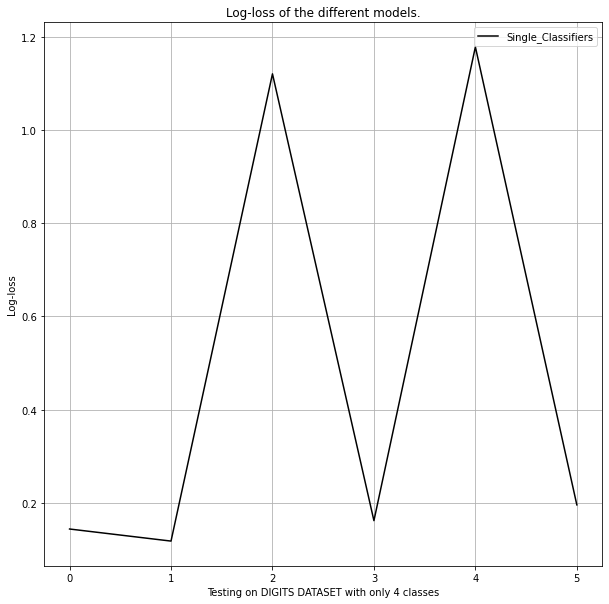

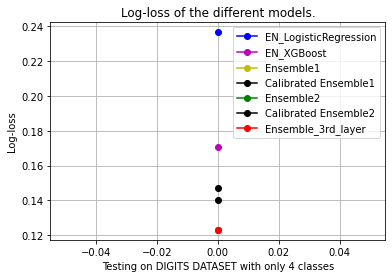

In [25]:
# Comparison of the 3L ENSEMBLE techniques (Ensemble1, Ensemble2, Ensemble3) with Ensemble Logistic & Ensemble XGBOOST (plotting the results)
#classes = 4

ll_sc = np.array(ll_sc).reshape(-1, len(clfs)).T
#print(ll_sc)
ll_ensemble1 = np.array(ll_ensemble1)
ll_ensemble2 = np.array(ll_ensemble2)
ll_ensemble3 = np.array(ll_ensemble3)
ll_ensemble1_cc = np.array(ll_ensemble1_cc)
ll_ensemble2_cc = np.array(ll_ensemble2_cc)
ll_lr = np.array(ll_lr)
ll_gb = np.array(ll_gb)

plt.figure(figsize=(10,10))
plt.plot(ll_sc, color='black', label='Single_Classifiers')

for i in range(1, 6):
    plt.plot(ll_sc[i], color='black')
plt.title('Log-loss of the different models.')
plt.xlabel('Testing on DIGITS DATASET with only 4 classes')
plt.ylabel('Log-loss')
plt.grid(True)
plt.legend(loc=1)
plt.show()

plt.title('Log-loss of the different models.')
plt.xlabel('Testing on DIGITS DATASET with only 4 classes')
plt.ylabel('Log-loss')
plt.plot(ll_lr, 'bo-', label='EN_LogisticRegression', )
plt.plot(ll_gb, 'mo-', label='EN_XGBoost')
plt.plot(ll_ensemble1, 'yo-', label='Ensemble1')
plt.plot(ll_ensemble1_cc, 'ko-', label='Calibrated Ensemble1')
plt.plot(ll_ensemble2, 'go-', label='Ensemble2')
plt.plot(ll_ensemble2_cc, 'ko-', label='Calibrated Ensemble2')
plt.plot(ll_ensemble3, 'ro-', label='Ensemble_3rd_layer')

plt.grid(True)
plt.legend(loc=1)
plt.show()

In [26]:
print(np.argmax(y_thirdlayer, axis=1))
y_pred_meta_self_learner = np.argmax(y_thirdlayer, axis=1)

[2 3 3 3 0 0 2 1 0 0 0 3 2 1 3 3 2 1 3 3 3 3 2 3 0 3 0 2 0 3 2 2 1 3 0 2 3
 2 1 0 2 1 3 3 3 1 3 3 3 3 0 1 3 2 1 3 3 3 1 0 2 3 2 2 0 2 0 1 0 2 2 3 0 3
 2 0 0 1 2 2 0 3 1 0 2 3 0 1 1 0 0 2 3 3 2 1 1 2 1 1 3 0 0 1 0 1 3 3 3 1 1
 0 1 3 3 1 0 2 0 1 1 1 2 0 0 3 3 0 2 3 1 3 3 0 3 0 3 3 2 0 2 3 2 0]


In [27]:
y_pred_meta_self_learner

array([2, 3, 3, 3, 0, 0, 2, 1, 0, 0, 0, 3, 2, 1, 3, 3, 2, 1, 3, 3, 3, 3,
       2, 3, 0, 3, 0, 2, 0, 3, 2, 2, 1, 3, 0, 2, 3, 2, 1, 0, 2, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 1, 0, 2, 3, 2, 2, 0, 2,
       0, 1, 0, 2, 2, 3, 0, 3, 2, 0, 0, 1, 2, 2, 0, 3, 1, 0, 2, 3, 0, 1,
       1, 0, 0, 2, 3, 3, 2, 1, 1, 2, 1, 1, 3, 0, 0, 1, 0, 1, 3, 3, 3, 1,
       1, 0, 1, 3, 3, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 3, 3, 0, 2, 3, 1, 3,
       3, 0, 3, 0, 3, 3, 2, 0, 2, 3, 2, 0], dtype=int64)

[[36  1  0  0]
 [ 0 27  0  2]
 [ 0  0 29  1]
 [ 0  1  2 45]]


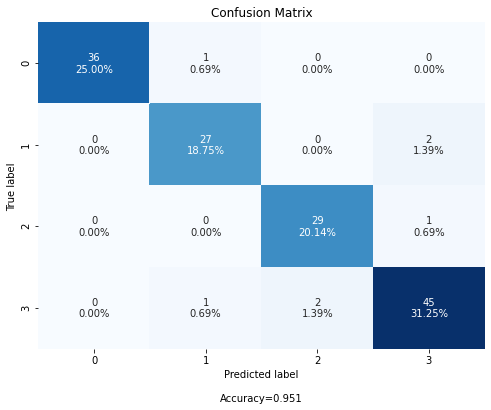

In [28]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_meta_self_learner)
print(cf_matrix)
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False, title='Confusion Matrix')

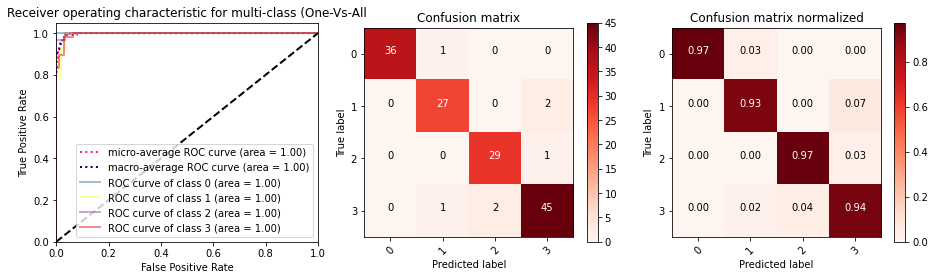

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.93      0.93      0.93        29
           2       0.94      0.97      0.95        30
           3       0.94      0.94      0.94        48

    accuracy                           0.95       144
   macro avg       0.95      0.95      0.95       144
weighted avg       0.95      0.95      0.95       144



In [29]:
# Visualisation with PLOTS:
mc = MultiClassClassification(y_test, y_thirdlayer, labels=[0, 1, 2, 3])
plt.figure(figsize=(13,4))
plt.subplot(131)
mc.plot_roc()
plt.subplot(132)
mc.plot_confusion_matrix()
plt.subplot(133)
mc.plot_confusion_matrix(normalize=True)

plt.savefig('figures/images/plot_multi_classification.png')
plt.show()

mc.print_report()